In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Gaussian ansatz

In [4]:
x, E = sp.symbols(r"x E", real=True)
m, a, R, ps0, psb, N = sp.symbols(r"m \alpha R \psi_0 \bar{\psi} N", positive=True)

In [5]:
# this is the gaussian wave function profile
def psi_ansatz(x):
    return ps0 * sp.exp(-(x/R)**2)
psi_ansatz(x)

\psi_0*exp(-x**2/R**2)

In [6]:
# we normalize the wave function to <psi|psi> = N
eq = sp.Equality(
    N, sp.integrate(abs(psi_ansatz(x))**2, (x, -sp.oo, sp.oo))
)
eq

Eq(N, sqrt(2)*sqrt(pi)*R*\psi_0**2/2)

In [7]:
# solve for \psi_0 in terms of N, R
ps0_sol = sp.solve(eq, ps0)[0]
sp.Eq(ps0, ps0_sol)

Eq(\psi_0, 2**(1/4)*sqrt(N)/(pi**(1/4)*sqrt(R)))

We will assume a nonlinear potential
$$
V(\psi) = \alpha \left(|\psi|^2 - \bar{\psi}^2\right)^2
$$

In [15]:
# calculate (one-dimensional) the energy density
f = psi_ansatz
energy_density = (
    -(1/(2*m))*sp.diff(f(x), x, x)*f(x) # kinetic term
    + a*((f(x)**2 - psb**2)**2 - psb**4)*(f(x)**2) # potential term
).subs(ps0, ps0_sol)

In [16]:
# variational energy
E_var = sp.integrate(energy_density, (x, -sp.oo, sp.oo))
E_var

2*sqrt(3)*N**3*\alpha/(3*pi*R**2) - 2*N**2*\alpha*\bar{\psi}**2/(sqrt(pi)*R) + N/(2*R**2*m)

In [17]:
# minimize with respect to R
sol = sp.solveset(sp.Eq(sp.diff(E_var, R), 0), R)
print(len(sol), "solution(s)")

1 solution(s)


In [18]:
sp.Eq(R, sol.args[0].simplify())

Eq(R, (4*sqrt(3)*N**2*\alpha*m + 3*pi)/(6*sqrt(pi)*N*\alpha*\bar{\psi}**2*m))

In [19]:
# confirm rewritten stuff is equivalent
R0 = 1/((psb**2)*sp.sqrt(a*m))
Nt = N/sp.sqrt((3*sp.pi)/(4*sp.sqrt(3)*a*m))
((R0/sp.Pow(3, sp.Rational(1, 4)))*(Nt**2 + 1)/Nt - sol.args[0]).simplify() == 0

True

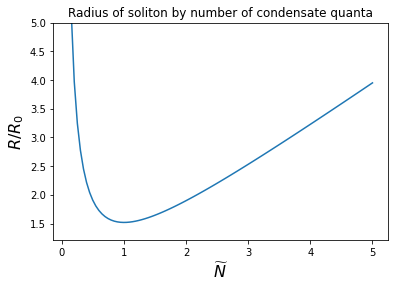

In [22]:
# plot behavior of R with N
N = np.linspace(0.1, 5, 100)
R = (N**2 + 1)/N/(3**0.25)
plt.plot(N, R)
plt.xlabel(r"$\widetilde{N}$", fontsize=16)
plt.ylabel(r"$R/R_0$", fontsize=16)
plt.ylim(top=5)
plt.title("Radius of soliton by number of condensate quanta")
plt.gca().set_facecolor("w")
plt.savefig("images/theoretical_growth_curve.png", bbox_inches="tight", dpi=100, facecolor="w", transparent=False)
plt.show()